# Image Recognition

## 1 | Download and Open Dataset

In [9]:
%pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/0f/a5/89a9bdae9f241cad167edb6c890ef2b4c842c5ae81058a2fbfd702dba9bf/tensorflow-2.17.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.17.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad418

In [19]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [20]:
#Dismiss project warnings
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [24]:
#we want to load the tensorflow package
import tensorflow as tf

#we now want to add a dataset to work with at the outset
#the good thing is that tensorflow does have some datasets that can be readily applied

mnist = tf.keras.datasets.mnist #28 by 28 images of hand-written digits, 0 through 9

#these are all unique images
#the idea is to feed the pixel features throught then neural network and have the neural work
#output which number it things the number is 

#we now want to unpack the dataset into training and testing datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)

In [25]:
import numpy as np
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

NameError: name 'x_train' is not defined

In [26]:
x_train

NameError: name 'x_train' is not defined

In [ ]:
y_train

In [11]:
#this is what the tensor array looks like, the pixels are made numbers
print(x_train[0])

#this the actual data we're going to be passing though our neural network

NameError: name 'x_train' is not defined

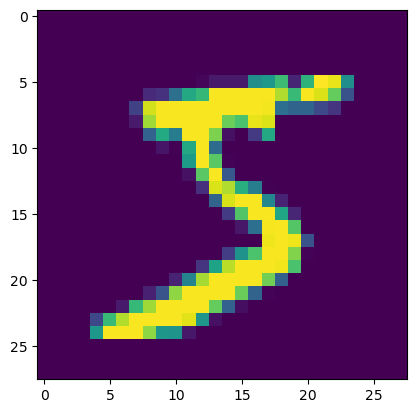

In [7]:
#let's now take a look at what this looks like 
#we are going to import madplotlib

import matplotlib.pyplot as plt

plt.imshow(x_train[0])

## 2 | Rescale Dataset

In [27]:
#The next thing we want to do is rescale our pictures; there 
#are pixels of different levels
#These are now between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

NameError: name 'x_train' is not defined

In [9]:
import numpy as np
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
#let's look at the values now
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

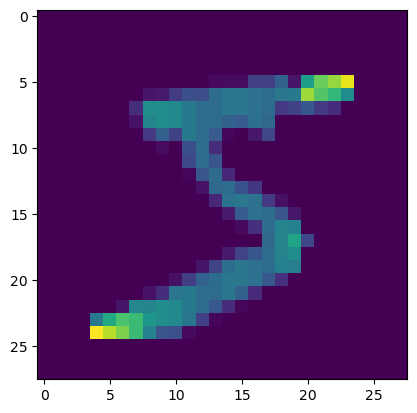

In [11]:
#what about the image?
plt.imshow(x_train[0])

## 3 | Build Model

In [12]:
#the next thing we're going to do is build the model
#in this case, we're going to use a sequential model 
#the sequential is the most common, it is a feed forward model 

model = tf.keras.models.Sequential() #input lay 
model.add(tf.keras.layers.Flatten()) #we now want to flatten the image as it is 28x28 

#we're going with two hidden layers, 128 units/neurons in a layer
#next is the activation function, this is a stepper function that makes the neuron fire
#in this case, we use relu which is rectified linear which is the default go-to activation function 
#you can tweak it to later to see if you better results
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#this is our output layer, this will have the number of classifications; we will have 10
#we don't to use relu, we want to use softmax which is for a probability distribution


#This is our final layer. It has 10 nodes. 1 node per possible number 
#prediction. In this case, our activation function is a softmax function, 
#since we're really actually looking for something more like a probability distribution of 
#which of the possible prediction options this thing we're passing features 
#through of is. Great, our model is done.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #softmax is used because we want to classsify these number multinomially

In [13]:
#now we want to add some parameters to our model for it to be trained
#we want to add a loss metric; loss is the degree of error, it's what you got wrong 
#NN doesn't optimize for accuracy, it always trying to minimize loss  
#adam is the go-to optimizer
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])

In [14]:
#now we train the model
#Epoch is just a "full pass" through your entire training dataset. 
#So if you just train on 1 epoch, then the neural network saw each unique 
#sample once. 3 epochs means it passed over your data set 5 times.
epochs = 5
model.fit(x_train, y_train, epochs=epochs) 

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8679 - loss: 0.4670
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9654 - loss: 0.1114
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9782 - loss: 0.0701
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0520
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9878 - loss: 0.0370


In [15]:
#View all the layers of the network using the Keras Model.summary 
#method:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 128)              │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,848 (1.35 MB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,566 (924.09 KB)

## 4 | Evaluate and Save Model

In [16]:
#nn are great at fitting, the only question is if they have overfit 
#you hope that you model learned patterns about what makes an 8 or a 6
#you didn't want the model to memorize every single sample that you pass 
#the next thing we want to do is calculate the validation loss and accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

#loss is 8% and the accuracy is 97% 
#these are very similar to our NN results on the final epoch

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.9707 - loss: 0.1087
0.09547886997461319
0.9739999771118164


In [17]:
#It's going to be very likely your accuracy out of sample is a bit worse, same with loss. In fact, it should be a red flag if it's identical, or better.

#Finally, with your model, you can save it super easily:
model.save('number_reader.keras')

## 5 | Make Predictions

In [18]:
#Prints predictions
predictions = model.predict(x_test)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
[[5.15108399e-12 3.71852416e-09 1.03652859e-07 ... 9.99999762e-01
  2.03961931e-10 7.63556418e-09]
 [9.09315917e-13 1.43932757e-05 9.99984622e-01 ... 2.49509990e-09
  8.24814050e-10 1.02341739e-15]
 [5.33658309e-08 9.99754488e-01 1.88351362e-06 ... 1.53520901e-04
  4.52446584e-05 9.07232061e-06]
 ...
 [1.05669684e-09 8.57643329e-07 5.08709685e-10 ... 1.21782705e-05
  2.23720384e-08 2.52146356e-06]
 [1.06904999e-10 1.66002216e-08 6.35949002e-11 ... 5.67894398e-09
  1.00452644e-05 6.84707638e-11]
 [4.55847360e-09 6.98480940e-10 5.67464964e-09 ... 1.76485770e-10
  2.15944707e-10 2.42008896e-11]]


In [19]:
#Make sense of predictions
import numpy as np
print(np.argmax(predictions[19]))

4


Our model predicts that the image will be an image of the number 7. Let's see if that's correct.

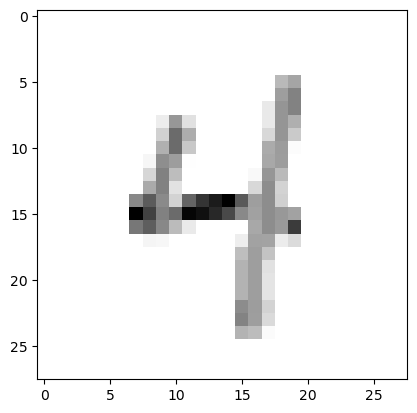

In [20]:
plt.imshow(x_test[19],cmap=plt.cm.binary)
plt.show()

Our model's prediction was accurate